Logistic Vs Tanh 12th

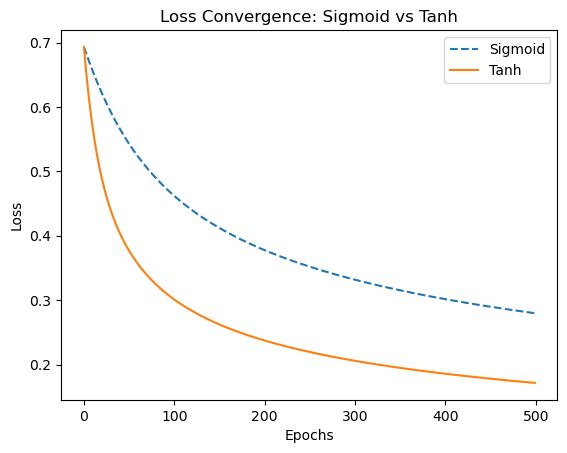

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(100, 1)  # 100 samples, 1 feature
true_w = 2.0
true_b = -1.0
y = (true_w * X + true_b + 0.1 * np.random.randn(100, 1) > 0).astype(int)  # Binary labels

# Sigmoid and Tanh activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Gradient Descent for Logistic Regression
def train(X, y, activation, lr=0.1, epochs=500):
    m, n = X.shape
    W = np.zeros((n, 1))
    b = 0
    losses = []
    
    for epoch in range(epochs):
        z = X.dot(W) + b
        
        if activation == 'sigmoid':
            y_pred = sigmoid(z)
            grad_a = y_pred * (1 - y_pred)  # Derivative of Sigmoid
        elif activation == 'tanh':
            y_pred = tanh(z) * 0.5 + 0.5  # Shift Tanh to match [0,1] range
            grad_a = 0.5 * (1 - tanh(z)**2)  # Derivative of Tanh
        
        loss = binary_cross_entropy(y, y_pred)
        losses.append(loss)
        
        dW = (1/m) * X.T.dot((y_pred - y) * grad_a)
        db = np.mean((y_pred - y) * grad_a)
        
        W -= lr * dW
        b -= lr * db
    
    return W, b, losses

# Train both models
_, _, losses_sigmoid = train(X, y, activation='sigmoid')
_, _, losses_tanh = train(X, y, activation='tanh')

# Plot loss convergence
plt.plot(losses_sigmoid, label='Sigmoid', linestyle='--')
plt.plot(losses_tanh, label='Tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Convergence: Sigmoid vs Tanh')
plt.show()
